# 로지스틱 회귀(Logistic Regression)
* 이진분류를 분석할 때 사용
* Baseline으로 자주 활용
* 장점
>* 선형회귀 만큼 구현 용이
>* 기울기를 사용하여 각 변수의 중요성을 쉽게 파악
* 단점
>* 선형회귀 분석이 근간 이기 때문에, 선형관계가 아닌 데이터의 예측력이 떨어짐

# Titanic Logistic Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("https://github.com/BigData23th/Data/raw/main/titanic_train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 독립변수
* PassengerID : 번호
* Pclass : 티켓 클래스
* Sibsp : 동승한 형제, 배우자
* Parch : 동승한 부모, 자녀
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 호실
* Embarked : 승선 항구

### 상관 관계 파악
* corr<0.2 : 상관관계 거의 없음
* 0.2~0.4 : 낮은 상관관계
* 0.4~0.6 : 중간 상관관계
* 0.6~0.8 : 높은 상관관계
* 0.8~1.0 : 매우높은 상관관계
    

In [7]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

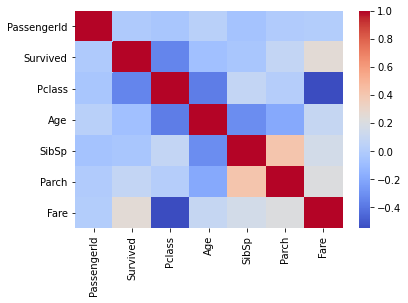

In [8]:
sns.heatmap(train.corr(),cmap='coolwarm')

<AxesSubplot:>

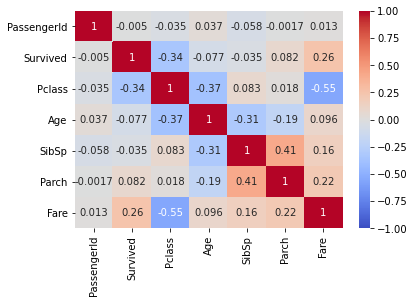

In [9]:
sns.heatmap(train.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

In [10]:
train.set_index('PassengerId',inplace=True)


In [11]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<AxesSubplot:>

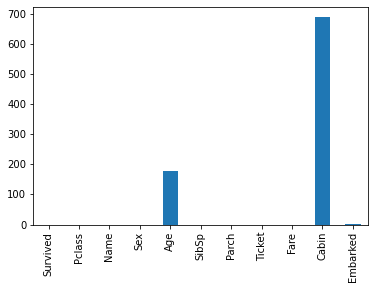

In [12]:
train.isnull().sum().plot(kind='bar') # 결측치 개수 확인


## 결측치 처리 방법
1. 10% 미만
>* 최빈값 or 평균값
>* 중요한 데이터일 경우 행 삭제
2. 20~30% => 임의로 넣기엔 애매, 빈값으로 처리 하기에는 아쉬움
>* 그룹별로 통계치를 만들어 그룹에 넣음 ex)성별, Pclass에 따른 나이
>* Null을 하나의 항목으로
3. 7~80 -> 해당열 삭제 or 0으로 채움

In [13]:
train.Embarked = train.Embarked.fillna('S')
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [14]:
train.drop(['Cabin'],axis=1,inplace=True)  

In [15]:
train.Age.mean()

29.69911764705882

In [16]:
train.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
# ,로 시작하고, \s(공백)*(0개이상)+(1개이상).(0~1개)
# ([A-Za-z]) : 

In [18]:
# Series -> 반복되는 문자열 요소를 지닌 리스트
# 정규 표현식
# chatgpt한테 물어보자..
aa=train.Name.str.extract(',\s*([A-Za-z]+\.)') 
aa

,0
PassengerId,
1,Mr.
2,Mrs.
3,Miss.
4,Mrs.
5,Mr.
...,...
887,Rev.
888,Miss.
889,Miss.


In [19]:
train['Title'] = aa

In [20]:
vc=train.Title.value_counts()
rare_title = vc[vc<10]
rare_title

Dr.          7
Rev.         6
Major.       2
Mlle.        2
Col.         2
Don.         1
Capt.        1
Ms.          1
Jonkheer.    1
Lady.        1
Sir.         1
Mme.         1
Name: Title, dtype: int64

In [21]:
# 해당하는 값들을 변경한다
train['Title']=train["Title"].replace(rare_title.index,'Rare')

In [22]:
train['Title'].value_counts()
train['Title']= train['Title'].fillna('Rare')
train['Title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Rare        27
Name: Title, dtype: int64

In [23]:
title_age_mean = train.groupby(['Title'])['Age'].mean()
title_age_mean

Title
Master.     4.574167
Miss.      21.773973
Mr.        32.368090
Mrs.       35.898148
Rare       42.384615
Name: Age, dtype: float64

In [24]:
train.loc[train.Age.isnull(),'Age']

PassengerId
6     NaN
18    NaN
20    NaN
27    NaN
29    NaN
       ..
860   NaN
864   NaN
869   NaN
879   NaN
889   NaN
Name: Age, Length: 177, dtype: float64

In [25]:
train.loc[train.Title=='Mr.','Age']

PassengerId
1      22.0
5      35.0
6       NaN
7      54.0
13     20.0
       ... 
882    33.0
884    28.0
885    25.0
890    26.0
891    32.0
Name: Age, Length: 517, dtype: float64

In [26]:
title_age_mean['Mr.']

32.368090452261306

In [27]:
train_copy =train.copy()

train_copy['Age']=train_copy.apply(lambda x:title_age_mean[x.Title] if np.isnan(x.Age) else x.Age , axis=1)

train_copy

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rare
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss.
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss.


In [28]:
train_copy.drop(['Ticket', 'Name', 'Title'], axis=1, inplace=True)

In [29]:
train_copy = pd.get_dummies(train_copy, columns=['Sex', 'Embarked'], drop_first=True)

In [30]:
train_copy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,1,0,1
2,1,1,38.000000,1,0,71.2833,0,0,0
3,1,3,26.000000,0,0,7.9250,0,0,1
4,1,1,35.000000,1,0,53.1000,0,0,1
5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,1,0,1
888,1,1,19.000000,0,0,30.0000,0,0,1
889,0,3,21.773973,1,2,23.4500,0,0,1


In [31]:
X, y = train_copy.drop('Survived', axis=1), train['Survived']
# X, y = train.iloc[:, 1:], train.iloc[:, 0]
X, y

(             Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
 PassengerId                                                                   
 1                 3  22.000000      1      0   7.2500         1           0   
 2                 1  38.000000      1      0  71.2833         0           0   
 3                 3  26.000000      0      0   7.9250         0           0   
 4                 1  35.000000      1      0  53.1000         0           0   
 5                 3  35.000000      0      0   8.0500         1           0   
 ...             ...        ...    ...    ...      ...       ...         ...   
 887               2  27.000000      0      0  13.0000         1           0   
 888               1  19.000000      0      0  30.0000         0           0   
 889               3  21.773973      1      2  23.4500         0           0   
 890               1  26.000000      0      0  30.0000         1           0   
 891               3  32.000000      0  

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\tkd89\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [34]:
model.predict_proba(X_test)

array([[0.20230873, 0.79769127],
       [0.95221909, 0.04778091],
       [0.88292738, 0.11707262],
       [0.17287195, 0.82712805],
       [0.61329732, 0.38670268],
       [0.89724226, 0.10275774],
       [0.91884457, 0.08115543],
       [0.86621912, 0.13378088],
       [0.63008435, 0.36991565],
       [0.93302148, 0.06697852],
       [0.76635643, 0.23364357],
       [0.92043803, 0.07956197],
       [0.45516067, 0.54483933],
       [0.85838611, 0.14161389],
       [0.62178654, 0.37821346],
       [0.20230992, 0.79769008],
       [0.92046341, 0.07953659],
       [0.44309101, 0.55690899],
       [0.32615066, 0.67384934],
       [0.26006635, 0.73993365],
       [0.73327485, 0.26672515],
       [0.82182759, 0.17817241],
       [0.67433203, 0.32566797],
       [0.44458024, 0.55541976],
       [0.80028003, 0.19971997],
       [0.92049675, 0.07950325],
       [0.82482953, 0.17517047],
       [0.93989226, 0.06010774],
       [0.92047012, 0.07952988],
       [0.92075019, 0.07924981],
       [0.

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7486033519553073

In [36]:
model.coef_

array([[-1.25611837e+00, -5.11119081e-02, -3.59867783e-01,
        -1.68274836e-01, -5.94122369e-04, -2.63291327e+00,
         2.76262047e-01, -3.69831907e-01]])

In [37]:
model.coef_[0].shape
model.coef_.reshape(-1).shape

(8,)

In [38]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.256118
Age          -0.051112
SibSp        -0.359868
Parch        -0.168275
Fare         -0.000594
Sex_male     -2.632913
Embarked_Q    0.276262
Embarked_S   -0.369832
dtype: float64